In [305]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import koreanize_matplotlib
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import zscore

1. **데이터 전처리**
    - 3개 데이터 파일을 불러와 전처리하시오.
    - 각 파일의 상단에 기재된 기간(월) 정보를 활용하여 **기간** 컬럼을 추가할 것.
    - 컬럼명 **합계**는 앞에 공백이 포함되어 있으므로 **“ 합계”** 로 되어 있음을 확인하고 처리할 것.

In [308]:
df = []
for i in range(6, 9):
    temp = pd.read_excel(f'07_ERP/기간별상품매출현황_20230{i}.xlsx', skiprows=2)
    temp['기간'] = str(i) + '월'
    temp = temp.iloc[2:]
    df.append(temp)

df = pd.concat([data for data in df], ignore_index=True)
df = df.rename(columns={' 합계': '합계'})
df2 = pd.melt(df, id_vars=['순번', '상품코드', '상품명', '합계', '기간'], var_name = '지점명', value_name='판매량').fillna(0)
df2

,순번,상품코드,상품명,합계,기간,지점명,판매량
0,1.0,1.801828e+06,자연숨결 식약처 허가 초미세먼지 마스크 대형 60매(KF94),65402,6월,(1154)의정부점,174
1,2.0,1.801859e+06,블루방역황사마스크 65매 KF94,1,6월,(1154)의정부점,0
2,3.0,4.078618e+07,클린위즈 매직클리너 얼룩제거 세트,2158,6월,(1154)의정부점,4
3,4.0,4.100136e+07,트루마리 순수휴지 30미터 90롤,3649,6월,(1154)의정부점,14
4,5.0,8.800532e+07,자연숨결 식약처 허가 초미세먼지 마스크 대형30매 + 중형 30매(KF94),1,6월,(1154)의정부점,0
...,...,...,...,...,...,...,...
240091,126.0,8.801858e+12,[쨍하고해뜰집]제습제풀세트(다용도제습제30통+지시겔1봉),653,8월,(4548)NBFC칠곡석적점,0
240092,127.0,8.801858e+12,[리얼뽀송이]제습제세트,3233,8월,(4548)NBFC칠곡석적점,0
240093,128.0,8.801858e+12,[미라클워터]다목적세정제17종괴물용량풀세트,8433,8월,(4548)NBFC칠곡석적점,0
240094,129.0,8.801858e+12,[쨍하고해뜰집]지시겔1봉(20개),135839,8월,(4548)NBFC칠곡석적점,0


2. **상위 2개 지점 선정**
    
    각 지점별 **판매량**의 합계를 계산하여, 그 중 합계가 가장 높은 상위 2개 지점을 확인하시오.

In [310]:
high_two = df2.groupby('지점명')['판매량'].sum().sort_values(ascending=False).head(2)
high_two

지점명
(610)부천점    67612
(600)안양점    62987
Name: 판매량, dtype: int64

3. **히스토그램 시각화**
    
    2번에서 확인한 상위 2개 지점의 **판매량** 데이터를 히스토그램으로 시각화하시오.

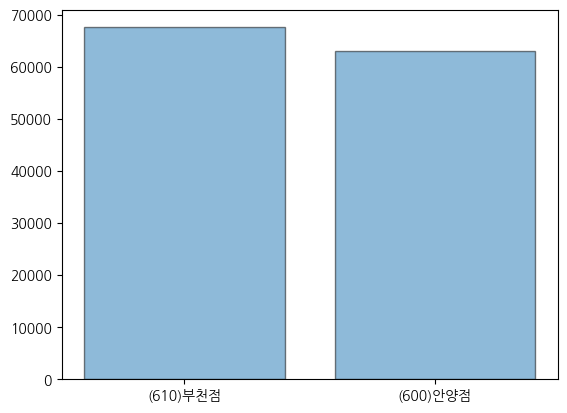

In [312]:
df3 = pd.DataFrame(high_two)

plt.bar(df3.index, df3['판매량'], alpha = 0.5, edgecolor = 'black')
plt.show()

4. **기간별 최고 판매 지점 및 저장 함수 생성**
    - 각 기간(월)별로 **판매량** 합이 가장 높은 지점을 확인하시오.
    - 특정 기간(월)을 입력하면, 해당 월의 각 지점별 **판매량** 합계를 **result_{월}.xlsx** 파일로 저장하는 함수를 작성하시오.

In [317]:
# 각 기간(월)별로 판매량 합이 가장 높은 지점
for i in range(6, 9):
    print(df2[df2['기간'] == f'{i}월'].groupby('지점명')['판매량'].sum().idxmax())

# 특정 월 입력
month = int(input('월을 입력하세요 : '))

select_month = df2[df2['기간'] == f'{month}월'].groupby('지점명')['판매량'].sum().to_frame()
select_month.to_excel(f'result_{month}.xlsx')

select_month

(610)부천점
(610)부천점
(740)속초점


월을 입력하세요 :  6


,판매량
지점명,
(1154)의정부점,6829
(1155)별내점,8374
(1156)풍산점,12626
(1157)김포한강점,11767
(1158)세종점,10912
...,...
(L38)율전점,1782
(L39)본오점,3129
(L40)검암점,1712


5. **정규성 검정**
    
    2번에서 선정한 2개 지점의 **판매량** 데이터에 대해 각각 정규성 검정을 수행하고, 그 결과에 따른 결론을 작성하시오.

In [319]:
first, second = high_two.index

list1 = [i for i in df2[df2['지점명'] == first]['판매량']]
list2 = [i for i in df2[df2['지점명'] == second]['판매량']]

# 정규성 검정
print(stats.shapiro(list1))
print(stats.shapiro(list2))

# 결론 : 정규성을 만족하지 않는다.

ShapiroResult(statistic=0.35796291261487223, pvalue=7.24716285463559e-34)
ShapiroResult(statistic=0.44767860990061403, pvalue=5.195484375652869e-32)


6. **가설 검정**
    - 2번에서 선정한 2개 지점의 **판매량** 대표값 차이를 비교하고자 할 때, 적절한 가설(귀무가설과 대립가설)을 수립하시오.

In [321]:
# 귀무가설 :
# "선정된 두 지점의 판매량 대표값에는 차이가 없다."

# 대립가설 :
# "선정된 두 지점의 판매량 대표값에는 차이가 있다."

7. **상품분류에 따른 판매량 대표값 차이 검정**
    - **상품명**을 기반으로 ‘마스크’와 ‘휴지’ 제품을 구분하되, 해당 두 제품 외의 상품은 **기타**로 분류하여 **상품분류**라는 파생변수를 생성하시오.
    - ‘마스크’와 ‘휴지’ 두 상품의 **판매량** 대표값 차이에 대해 가설을 수립하고, 가설 검정을 수행하시오.

In [323]:
df2['상품분류'] = df2['상품명'].apply(lambda x: '마스크' if '마스크' in x else ('휴지' if '휴지' in x else '기타'))

mask = [i for i in df2[df2['상품분류'] == '마스크']['판매량']]
tissue = [i for i in df2[df2['상품분류'] == '휴지']['판매량']]

# 정규성 검정
print(stats.shapiro(mask))
print(stats.shapiro(tissue))

# 정규성 만족 X 
print(stats.mannwhitneyu(mask, tissue))

# 결론 : 두 그룹의 중앙값이 통계적으로 유의미하게 다름

ShapiroResult(statistic=0.25210547736845645, pvalue=9.107060079403786e-130)
ShapiroResult(statistic=0.20222676177312737, pvalue=1.2520872807408766e-131)
MannwhitneyuResult(statistic=252658610.5, pvalue=2.5537986096670727e-88)


8. **제품 불량률 확률 계산**
    
    한 회사의 제품 불량률이 10%일 때, 30개의 제품을 검사하여 5개 이상의 불량품이 나올 확률을 계산하시오.

In [325]:
n = 30
p = 0.1


1 - binom.cdf(4, n, p)

0.17549487903389516

9. **고객센터 문의 건수 확률 계산**
    
    어느 고객센터에 하루 평균 3건의 문의가 온다고 할 때, 하루에 문의가 5건 이상 올 확률을 계산하시오.

In [328]:
# 람다 : 전체 시행 횟수, k : 발생할 횟수
1 - poisson.cdf(4, 3)

0.1847367554762278

10. **데이터 표준화 및 시각화**
    
    '01_Data.csv' 파일의 **Amount_Month** 데이터를 표준화하여 표준 정규분포로 변환한 후, 그 결과를 그래프로 시각화하시오.

(array([2.0380e+03, 2.5420e+03, 1.6100e+02, 8.3160e+03, 6.0090e+03,
        2.2012e+04, 6.2680e+03, 1.5750e+03, 1.6660e+03, 2.6000e+01,
        3.3000e+02, 2.1800e+02, 1.0000e+00, 0.0000e+00, 1.0000e+01,
        9.0000e+00, 1.0500e+02, 0.0000e+00, 0.0000e+00, 1.5000e+01]),
 array([-2.5739466 , -2.04762736, -1.52130813, -0.99498889, -0.46866966,
         0.05764957,  0.58396881,  1.11028804,  1.63660728,  2.16292651,
         2.68924575,  3.21556498,  3.74188422,  4.26820345,  4.79452269,
         5.32084192,  5.84716115,  6.37348039,  6.89979962,  7.42611886,
         7.95243809]),
 <BarContainer object of 20 artists>)

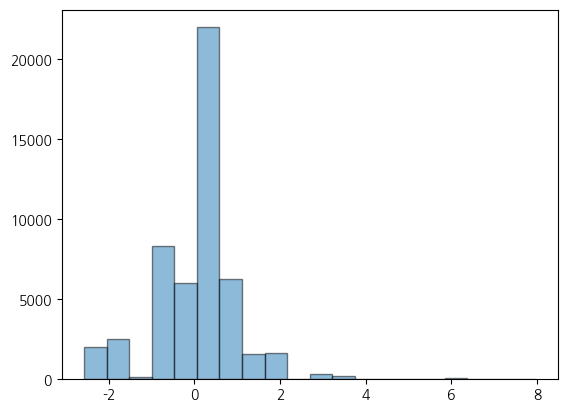

In [331]:
df = pd.read_csv('01_Data.csv')
plt.hist(zscore(df['Amount_Month']), bins = 20, edgecolor='black', alpha=0.5)